# Task 4.10 Part 1

<hr>

## Contents:

1. Import Libriaries <br>
2. Security Implications <br>
3. Regional Customer Information <br>
    3a. Regional Segmentation of the Data <br>
    3b. Spending Segmentation of Regions <br>
4. Creating Customer Activity Exclusion Flag <br>
    4a. Low Activity and High Activity Segmentation <br>
    4b. Exporting Two New Data Frames, Low Activity and High Activity Customers <br>
5. Customer Profiling <br>
    5a. Import Department Data <br>
    5b. Demographic Segmentation
        5b1. Age 
        5b2. Dependants 
        5b3. Income 
    5c. Department Segmentation <br>
    5d. Behavioral Segmentation
        5d1. Customers with babies 
        5d2. Order Time Habbits 
6. Customer Profile Visualizations <br>
7. Customer Profile Aggregation and Frequency <br>
8. Exporting Data Frames and Visualizations<br>

### 1. Import Libraries


In [1]:
# Import libraries 
import pandas as pd 
import numpy as np
import os

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

###  Data Import

In [2]:
# creating a path 

path = r'/Users/jacobyount/Documents/Data Analytics/Immersion 4/02.23.2023 Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'combined_data.pkl'))

### 2. Security Concerns

There are no PII data concerns in this data set. Previously there were two columns Surname and First Name, but were removed as they didnt provide any insight.

### 3. Regional Customer information

#### 3a. Regional Segmentation

In [4]:
df['state'].value_counts().sort_index()

Alabama                 637863
Alaska                  648451
Arizona                 653864
Arkansas                636070
California              659695
Colorado                639173
Connecticut             622940
Delaware                636906
District of Columbia    613598
Florida                 628964
Georgia                 656249
Hawaii                  632786
Idaho                   607036
Illinois                632928
Indiana                 627185
Iowa                    625429
Kansas                  637418
Kentucky                632389
Louisiana               637414
Maine                   638479
Maryland                626402
Massachusetts           646275
Michigan                630816
Minnesota               647738
Mississippi             632575
Missouri                640576
Montana                 635181
Nebraska                625736
Nevada                  636034
New Hampshire           615259
New Jersey              627599
New Mexico              654400
New York

In [5]:
# Defining Regions

Region1_northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Region2_midwest = ['Wisconsin', 'North Dakota', 'South Dakota', 'Illinios', 'Indiana', 'Ohio', 'Michigan', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
Region3_south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
Region4_west = ['Idaho', 'Washington', 'Oregon', 'Colorado', 'California', 'Arizona', 'New Mexico', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Alaska', 'Hawaii']

In [6]:
# Assigning regions to corresponding "region" column.

df.loc[df['state'].isin(Region1_northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(Region2_midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(Region3_south), 'region'] = 'South'
df.loc[df['state'].isin(Region4_west), 'region'] = 'West'

In [7]:
df['region'].value_counts().sort_index()

Midwest       6963137
Northeast     5721892
South        10790096
West          8291679
Name: region, dtype: int64

#### 3b. Spending Segmentation of Regions

In [8]:
# Creating a Crosstab for spending_flag and region to check if there is a noticable spending patern in each region.

crosstab = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [9]:
crosstab

spending_flag,high_spender,low spender
region,,
Midwest,144541,6818596
Northeast,107381,5614511
South,207902,10582194
West,159120,8132559


The cross tab shows that most customers in all four regions fall into your low spender category. There doesn't appear to be any major changes by region. The south region contains a larger customer base, but its spending flag is proportional to that of the other two regions.

### 4. Creating a Customer Exclusion Flag 

#### 4a. Low and High Activity Segmentation

In [10]:
df.loc[df['max_order'] < 5, ('exclusion_flag')] = 'low_activity'
df.loc[df['max_order'] >= 5, ('exclusion_flag')] = 'high_activity'
df['exclusion_flag'].value_counts(dropna = False)

high_activity    30959687
low_activity      1440045
NaN                  5127
Name: exclusion_flag, dtype: int64

In [11]:
# Replacing all NaN values as Low Activity Users.

df['exclusion_flag'].fillna('low_activity', inplace=True)

In [12]:
df['exclusion_flag'].value_counts(dropna = False)

high_activity    30959687
low_activity      1445172
Name: exclusion_flag, dtype: int64

In [13]:
# creating to seperate data frames for low and high activity customers

df_low_activity = df.loc[df['exclusion_flag'] == 'low_activity']
df_high_activity = df.loc[df['exclusion_flag'] == 'high_activity']

In [14]:
df_high_activity.shape

(30959687, 32)

#### 4b. Exporting New Data Frames

In [15]:
df_low_activity.to_pickle(os.path.join(path, '2. Data','Prepared Data', 'low_activity_customers.pkl'))

In [16]:
df_high_activity.to_pickle(os.path.join(path, '2. Data', 'Prepared Data', 'high_activity_customers.pkl'))

### 5. Customer Profiling

### 5a. Data Import
##### We will be using the High Activity data frame from this point forward as the client only want to see that data. 

In [17]:
# Importing the department data frame

dept_df = pd.read_csv(os.path.join(path, '2. Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [18]:
df = df_high_activity

In [19]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,Gender,state,Age,date_joined,num_dependants,fam_status,income,region,exclusion_flag
0,2539329.0,1.0,1.0,2.0,8.0,11.114836,196.0,1.0,0.0,Soda,...,regular_customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high_activity
1,2398795.0,1.0,2.0,3.0,7.0,15.000000,196.0,1.0,1.0,Soda,...,regular_customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high_activity
2,473747.0,1.0,3.0,3.0,12.0,21.000000,196.0,1.0,1.0,Soda,...,regular_customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high_activity
3,2254736.0,1.0,4.0,4.0,7.0,29.000000,196.0,1.0,1.0,Soda,...,regular_customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high_activity
4,431534.0,1.0,5.0,4.0,15.0,28.000000,196.0,1.0,1.0,Soda,...,regular_customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,South,high_activity


### 5b. Demographic Segmentation

### 5b1. Age Profile

In [20]:
df['Age'].describe()

count    3.095969e+07
mean     4.946803e+01
std      1.848527e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

The minimum age is 18 and max age is 81. We can break the ages down into three categories, Young Adult, Middle Aged, Elderly. <br>
18-39 = Young Adult <br>
40-65 = Middle Aged Adult <br>
65+ = Senior Adult

In [21]:
df.loc[(df['Age'] >= 18) & (df['Age'] < 40), 'age_category'] = 'young adult'
df.loc[(df['Age'] >=40) & (df['Age'] <65), 'age_category'] = 'middle aged adult'
df.loc[df['Age']>= 65, 'age_category'] = 'senior adult'
df['age_category'].value_counts()

middle aged adult    12101980
young adult          10663440
senior adult          8194267
Name: age_category, dtype: int64

### 5b2. Dependants Profile

In [22]:
df['num_dependants'].describe()

count    3.095969e+07
mean     1.501815e+00
std      1.118898e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_dependants, dtype: float64

The minimum amount of dependants is 0 and the max is 3. We will break this down into 3 categories. <br>
0 dependants = small family <br>
1-2 dependants = medium famly <br>
3 dependants = Large family

In [23]:
df.loc[df['num_dependants'] == 0, 'family_size'] = 'small'
df.loc[(df['num_dependants'] ==1) | (df['num_dependants'] == 2), 'family_size'] = 'medium'
df.loc[df['num_dependants']== 3, 'family_size'] = 'large'
df['family_size'].value_counts()

medium    15449870
large      7771309
small      7738508
Name: family_size, dtype: int64

In [24]:
crosstab_family_size = pd.crosstab(df['fam_status'], df['num_dependants'],  dropna = False)

In [25]:
crosstab_family_size

num_dependants,0.0,1.0,2.0,3.0
fam_status,,,,
divorced/widowed,2644831,0,0,0
living with parents and siblings,0,507980,484596,488403
married,0,7209966,7247328,7282906
single,5093677,0,0,0


After running a crosstab of our family status and number of dependants I will break this down into a new column called household. This will represent the the look of the household. This shows that people listed as single, divorced, or widowed all have 0 dependants. They will be moved into one group titled single adult.  <br>
divorced/widowed/single = single adult <br>
married = married w/ dependants <br>
living with parents and siblings = extended family w/ dependants

In [26]:
df.loc[(df['fam_status'] == 'divorced/widowed') & (df['num_dependants'] == 0) | (df['fam_status'] == 'single') & (df['num_dependants'] == 0), 'household'] = 'single adult'
df.loc[(df['fam_status'] == 'married') & (df['num_dependants'] <= 3), 'household'] = 'married w/ dependants'
df.loc[(df['fam_status'] == 'living with parents and siblings') & (df['num_dependants'] <= 3), 'household'] = 'extended fam w/ dependants'
df['household'].value_counts()

married w/ dependants         21740200
single adult                   7738508
extended fam w/ dependants     1480979
Name: household, dtype: int64

In [27]:
crosstab_age_household = pd.crosstab(df['age_category'], df['household'], dropna = False)

In [28]:
crosstab_age_household

household,extended fam w/ dependants,married w/ dependants,single adult
age_category,,,
middle aged adult,0,9045278,3056702
senior adult,0,6172663,2021604
young adult,1480979,6522259,2660202


The above cross tab shows that those living at home with family and dependants are all young adults. There is a higher population of people who are middle aged with dependants than any other category. 

### 5b3. Profiling Income

In [29]:
df['income'].describe()

count    3.095969e+07
mean     9.965502e+04
std      4.309143e+04
min      2.590300e+04
25%      6.728600e+04
50%      9.676100e+04
75%      1.280810e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
# Checking the median income to compare it to the average. 

df['income'].median()

96761.0

Minimun income is 25,903 and the max is 593,901. Median and mean are very close together indicating there arent too many high outliers that would casue the average to be off. I will create 3 categories to sub divide the incomes. <br>
Low income = 25,000 - 99,000 <br>
Medium income = 100,000 - 174,000 <br>
High income = 175,000 +

In [31]:
#creating and income flag for low, medium, and high income households.

df.loc[(df['income'] >= 25000) & (df['income'] <100000), 'income_flag'] = 'low income'
df.loc[(df['income'] >= 100000) & (df['income'] <175000), 'income_flag'] = 'medium income'
df.loc[df['income'] >= 175000, 'income_flag'] = 'high income'
df['income_flag'].value_counts()

low income       16756899
medium income    13903464
high income        299324
Name: income_flag, dtype: int64

### 5c. Profiling Departments

In [32]:
# Recalling the depatments data frame

dept_df

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [33]:
# Renaming index column to a department_id

dept_df.rename(columns= { 'Unnamed: 0' : 'department_id'}, inplace=True)

In [34]:
dept_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [35]:
# Pairing 'department_id' and 'department' with zip() function to create a dictionary

dept_map=dict(zip(dept_df["department_id"], dept_df["department"]))

In [36]:
dept_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [37]:
# Mapping customers to department df by the map() function and department dictionary(dept_map)

df['department'] = df['department_id'].map(dept_map)

In [38]:
#checking added column

df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,num_dependants,fam_status,income,region,exclusion_flag,age_category,family_size,household,income_flag,department
0,2539329.0,1.0,1.0,2.0,8.0,11.114836,196.0,1.0,0.0,Soda,...,3.0,married,40423.0,South,high_activity,young adult,large,married w/ dependants,low income,beverages
1,2398795.0,1.0,2.0,3.0,7.0,15.000000,196.0,1.0,1.0,Soda,...,3.0,married,40423.0,South,high_activity,young adult,large,married w/ dependants,low income,beverages
2,473747.0,1.0,3.0,3.0,12.0,21.000000,196.0,1.0,1.0,Soda,...,3.0,married,40423.0,South,high_activity,young adult,large,married w/ dependants,low income,beverages
3,2254736.0,1.0,4.0,4.0,7.0,29.000000,196.0,1.0,1.0,Soda,...,3.0,married,40423.0,South,high_activity,young adult,large,married w/ dependants,low income,beverages
4,431534.0,1.0,5.0,4.0,15.0,28.000000,196.0,1.0,1.0,Soda,...,3.0,married,40423.0,South,high_activity,young adult,large,married w/ dependants,low income,beverages


In [39]:
df['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5172305
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

Produce, dairy eggs, and snacks are the most frequent department sellers.

### 5d. Behavioral Sementation

### 5d1. Customers with Babies

In [40]:
df.loc[df['department'] == 'babies', 'Customer with baby'] = 'Yes'
df.loc[df['department'] != 'babies', 'Customer with baby'] = 'No'
df['Customer with baby'].value_counts(dropna =False)

No     30549295
Yes      410392
Name: Customer with baby, dtype: int64

In [41]:
crosstab_age_babies = pd.crosstab(df['age_category'], df['Customer with baby'], dropna = False)

In [42]:
crosstab_age_babies

Customer with baby,No,Yes
age_category,,
middle aged adult,11939248,162732
senior adult,8088063,106204
young adult,10521984,141456


There is no real difference in age group that buys baby products. Middle aged adults buy the most, and they are the group with the most dependants.

### 5d2. Order Time Habbits

In [43]:
df['order_hour_of_day'].value_counts()

10.0    2649337
11.0    2614450
14.0    2567517
13.0    2538913
15.0    2535562
12.0    2495388
16.0    2413244
9.0     2363267
17.0    1981993
8.0     1658866
18.0    1550914
19.0    1193661
20.0     930762
7.0      863086
21.0     763009
22.0     606997
23.0     384515
6.0      280970
0.0      208016
1.0      109605
5.0       84401
2.0       65677
4.0       50753
3.0       48784
Name: order_hour_of_day, dtype: int64

Breaking this down into 4 categories, morning, afternoon, night, and late night. Each being 6 hour time windows. 

In [44]:
df.loc[(df['order_hour_of_day'] < 12) & (df['order_hour_of_day'] >= 6), 'order_time_habbits'] = 'morning'
df.loc[(df['order_hour_of_day'] >= 12) & (df['order_hour_of_day'] < 18), 'order_time_habbits'] = 'afternoon'
df.loc[(df['order_hour_of_day'] >= 18) & (df['order_hour_of_day'] <= 23), 'order_time_habbits'] = 'night'
df.loc[(df['order_hour_of_day'] <= 5), 'order_time_habbits'] = 'late night'
df['order_time_habbits'].value_counts()

afternoon     14532617
morning       10429976
night          5429858
late night      567236
Name: order_time_habbits, dtype: int64

In [45]:
crosstab_age_order_habbits = pd.crosstab(df['age_category'], df['order_time_habbits'], dropna = False)

In [46]:
crosstab_age_order_habbits

order_time_habbits,afternoon,late night,morning,night
age_category,,,,
middle aged adult,5692150,218092,4067974,2123764
senior adult,3832761,149886,2764253,1447367
young adult,5007706,199258,3597749,1858727


Middle Aged adults do the most purchasing in the afternoon time window and order the most out of any age group in the morning. 

### 6. Customer Profile Visualizations

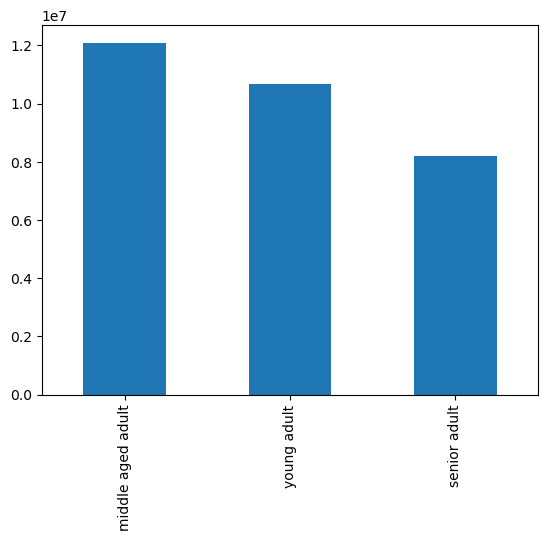

In [47]:
# Bar Chart for age_category

age_category_bar = df['age_category'].value_counts().plot.bar()

Observations: Middle Aged group is your largest customer base.

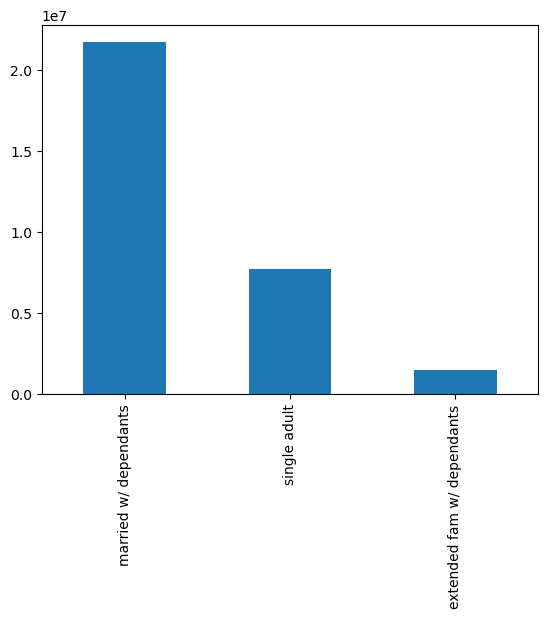

In [48]:
# Household Bar Chart

Household_bar = df['household'].value_counts().plot.bar()

Observations: Married with dependants group is your largest customer base.

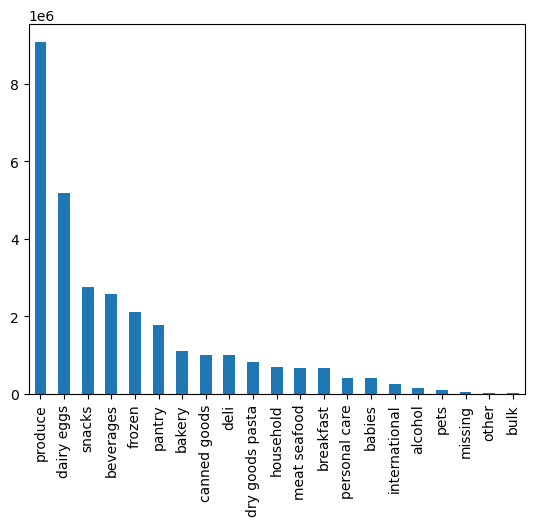

In [49]:
Department_bar = df['department'].value_counts().plot.bar()

Observations: Produce, eggs/dairy, and snacks are you highest selling products.

In [50]:
# creating a crosstab for department and region

crosstab_dept_region = pd.crosstab (df['department'],df['region'], dropna = False)
crosstab_dept_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,30436,25017,48813,36754
babies,87080,72712,139511,102428
bakery,240724,199300,371620,288155
beverages,549032,462929,859419,650574
breakfast,143762,117904,223172,173619
bulk,7353,5599,11180,8743
canned goods,217553,176936,337458,260221
dairy eggs,1109785,913813,1721319,1325890
deli,215704,178398,333620,257352


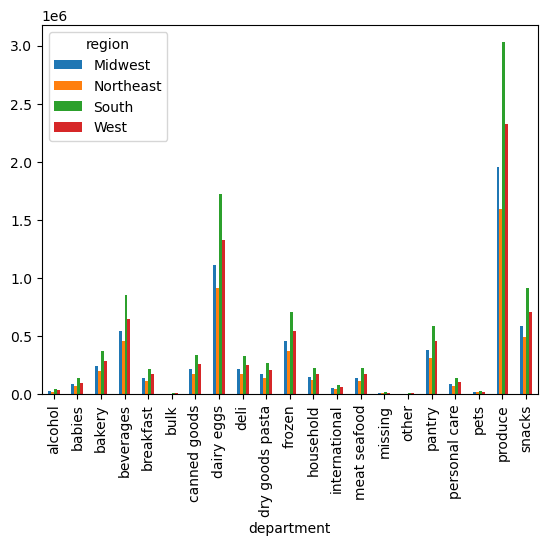

In [51]:
crosstab_dept_region_bar = crosstab_dept_region.plot.bar()

Observations: Produce, eggs/dairy, and snacks are you highest selling products in south region. Other High selling in that region are beverages, pantry, and frozen items.

In [52]:
# creating a crosstab for income and region

crosstab_income_region = pd.crosstab (df['region'],df['income_flag'], dropna = False)
crosstab_income_region

income_flag,high income,low income,medium income
region,,,
Midwest,70931,3529799,3054703
Northeast,47084,2948167,2468631
South,100207,5647111,4562124
West,76793,4300289,3548975


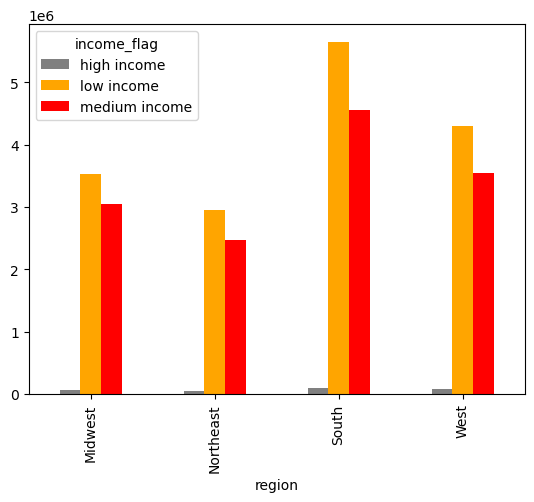

In [53]:
crosstab_region_income_bar = crosstab_income_region.plot.bar(color = ['grey', 'orange', 'red'])

Observations: The South region has a larger low income population, while the midwest and northeast low and medium incomes are closer.

In [54]:
# creating a crosstab for household and region

crosstab_household_region = pd.crosstab (df['region'], df['household'], dropna = False)
crosstab_household_region

household,extended fam w/ dependants,married w/ dependants,single adult
region,,,
Midwest,322128,4670853,1662452
Northeast,256417,3853188,1354277
South,505356,7222574,2581512
West,367805,5578064,1980188


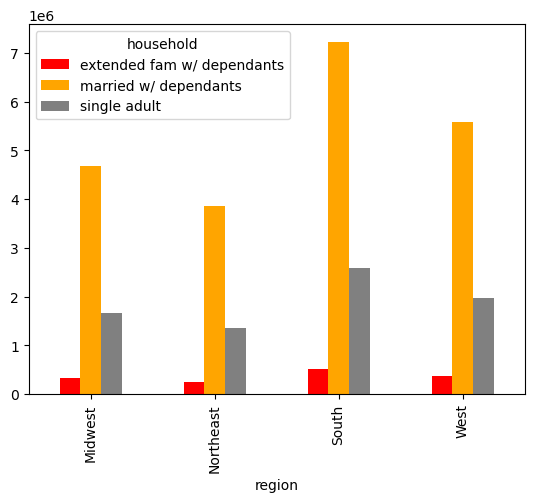

In [55]:
crosstab_region_household_bar = crosstab_household_region.plot.bar(color = ['red', 'orange', 'grey'])

Observations: Married w/ dependants are your main customer base in all four regions.

In [56]:
# creating a crosstab for age_category and region

crosstab_age_region = pd.crosstab (df['region'], df['age_category'], dropna = False)
crosstab_age_region

age_category,middle aged adult,senior adult,young adult
region,,,
Midwest,2634843,1751426,2269164
Northeast,2107762,1484610,1871510
South,3993815,2708062,3607565
West,3126407,2097867,2701783


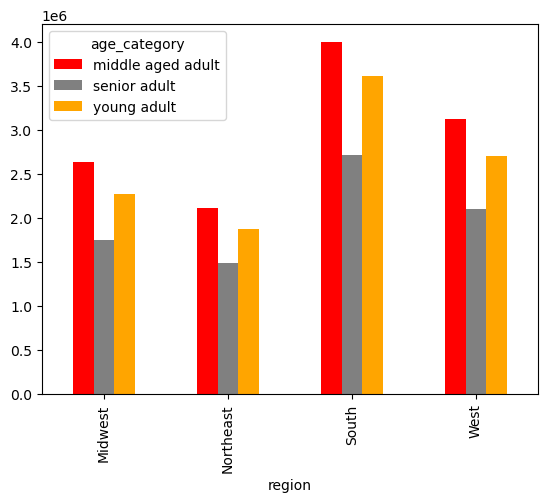

In [57]:
crosstab_age_region_bar = crosstab_age_region.plot.bar(color = ['red', 'grey', 'orange'])

Observations: Middle Aged Adult is your most common customer type in all four regions followed closely by young adults.

In [58]:
# creating a crosstab for customers with babies and region

crosstab_baby_region = pd.crosstab (df['region'], df['Customer with baby'], dropna = False)
crosstab_baby_region

Customer with baby,No,Yes
region,,
Midwest,6568353,87080
Northeast,5391170,72712
South,10169931,139511
West,7823629,102428


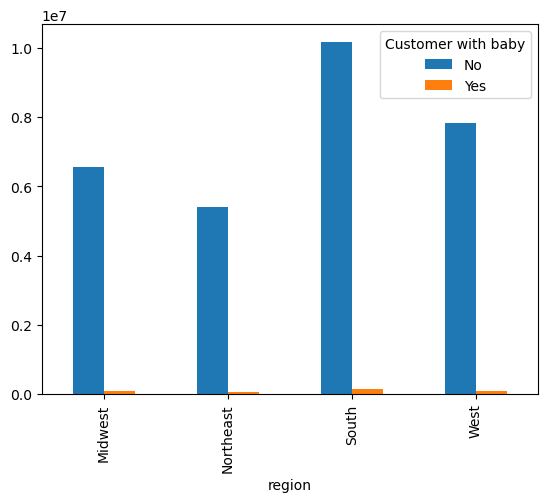

In [59]:
crosstab_baby_region_bar = crosstab_baby_region.plot.bar()

Observation: There isnt much to show for this customer base. more customers in all regions don't have a baby.

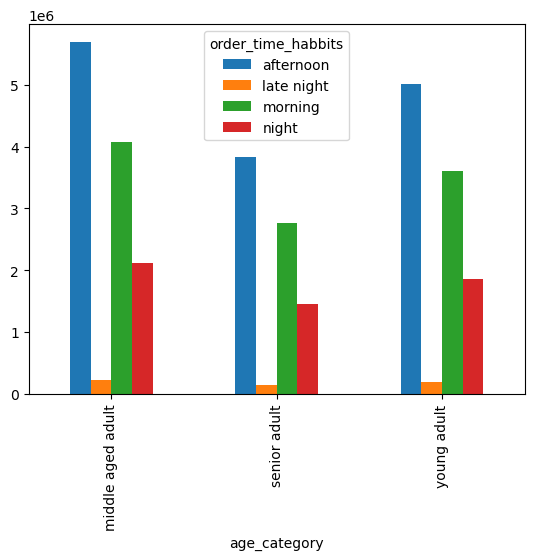

In [60]:
crosstab_age_order_habbits_bar  = crosstab_age_order_habbits.plot.bar()

Observation: Afternoon and morning are the busiest ordering times for all age categories. Late night is minimal in all age categories. 

In [61]:
# creating a crosstab for Order habbits with departments

crosstab_habbits_dept = pd.crosstab (df['department'], df['order_time_habbits'], dropna = False)
crosstab_habbits_dept

order_time_habbits,afternoon,late night,morning,night
department,,,,
alcohol,78928,1616,43257,20826
babies,178926,6085,146626,78755
bakery,532290,19341,378160,191037
beverages,1201018,48220,895348,427315
breakfast,302724,11531,239163,117432
bulk,15306,581,11474,6090
canned goods,488131,18807,331655,173481
dairy eggs,2381998,89242,1799703,901362
deli,480356,17967,330132,175379


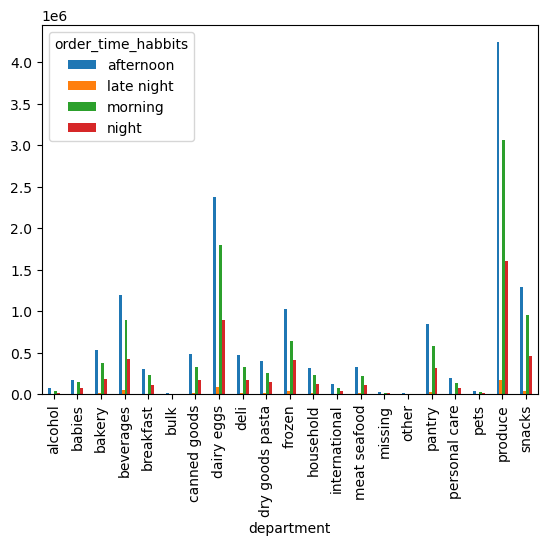

In [62]:
crosstab_habbits_dept_bar  = crosstab_habbits_dept.plot.bar()

Observation: Your top three products are ordered in the afternoon and morning windows the most. 

In [63]:
# creating a crosstab for customer loyalty and days_since_prior_order

crosstab_loyalty_prior_orders = pd.crosstab (df['days_since_prior_order'], df['loyalty_flag'], dropna = False)
crosstab_loyalty_prior_orders

loyalty_flag,loyal_customer,new_customer,regular_customer
days_since_prior_order,,,
0.000000,239618,40510,157828
1.000000,626077,43346,262125
2.000000,973092,60651,417424
3.000000,1185818,86122,587599
4.000000,1202810,107478,746909
5.000000,1074597,136050,886556
6.000000,1090840,191338,1196259
7.000000,1351150,291013,1774795
8.000000,643306,185284,1064949


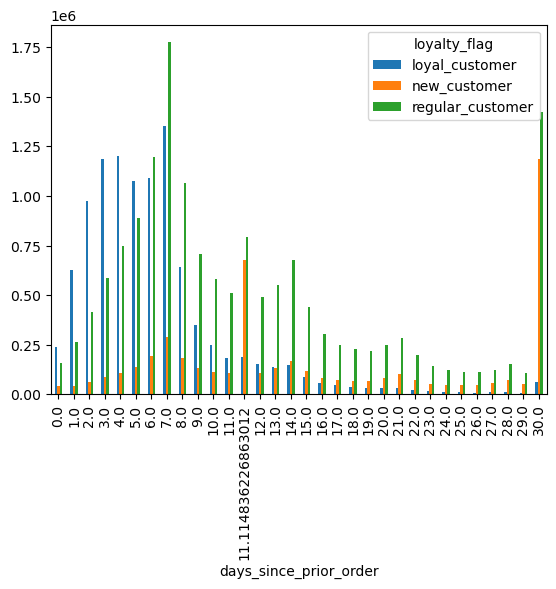

In [64]:
crosstab_loyalty_prior_orders_bar  = crosstab_loyalty_prior_orders.plot.bar()

Observation: Loyal customers make orders throughout the week while regular customers order every 7 days. 

In [65]:
# creating a crosstab for customer loyalty and department

crosstab_loyalty_dept_orders = pd.crosstab (df['department'], df['loyalty_flag'], dropna = False)
crosstab_loyalty_dept_orders

loyalty_flag,loyal_customer,new_customer,regular_customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1829377,749157,2593771
deli,324046,158335,521453


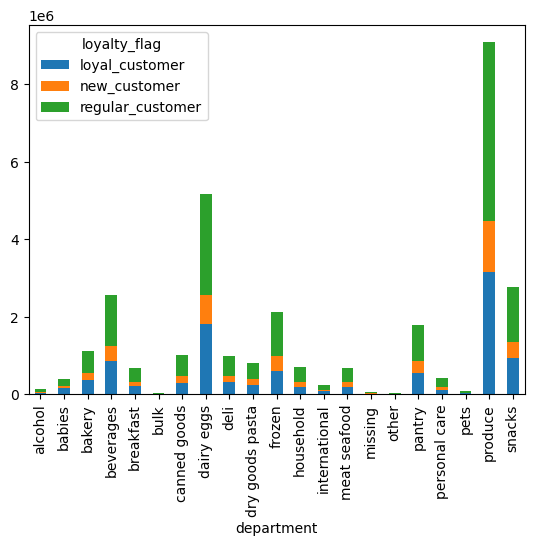

In [66]:
crosstab_loyalty_dept_orders_stacked = crosstab_loyalty_dept_orders.plot(kind = 'bar', stacked = True)

Observations: Regular customers are ordering the majority of produce, the top selling product. Loyal customers are ordering producs, dairy/eggs, snacls, and beverages the most. 

### 7. Customer Aggregation and Frequency

In [67]:
df.groupby('age_category').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order           
                       mean  min   max                   mean  min   max
age_category                                                            
middle aged adult  7.791529  1.0  25.0              10.837547  0.0  30.0
senior adult       7.796715  1.0  25.0              10.809062  0.0  30.0
young adult        7.784818  1.0  25.0              10.827406  0.0  30.0

In [68]:
df.groupby('household').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order       \
                                mean  min   max                   mean  min   
household                                                                     
extended fam w/ dependants  7.800604  1.0  25.0              10.770149  0.0   
married w/ dependants       7.790278  1.0  25.0              10.836523  0.0   
single adult                7.789550  1.0  25.0              10.809187  0.0   

                                  
                             max  
household                         
extended fam w/ dependants  30.0  
married w/ dependants       30.0  
single adult                30.0

In [69]:
df.groupby('family_size').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order           
                 mean  min   max                   mean  min   max
family_size                                                       
large        7.792886  1.0  25.0              10.832062  0.0  30.0
medium       7.789957  1.0  25.0              10.832404  0.0  30.0
small        7.789550  1.0  25.0              10.809187  0.0  30.0

In [70]:
df.groupby('income_flag').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order           
                   mean  min   max                   mean  min   max
income_flag                                                         
high income    7.790993  1.0  25.0              10.161862  0.0  30.0
low income     7.652564  1.0  25.0              10.859392  0.0  30.0
medium income  7.956935  1.0  25.0              10.801200  0.0  30.0

In [71]:
df.groupby('region').agg({'prices': ['mean', 'min', 'max'], 'days_since_prior_order': ['mean', 'min', 'max']})

prices            days_since_prior_order           
               mean  min   max                   mean  min   max
region                                                          
Midwest    7.792366  1.0  25.0              10.901496  0.0  30.0
Northeast  7.781441  1.0  25.0              10.792289  0.0  30.0
South      7.794439  1.0  25.0              10.830316  0.0  30.0
West       7.790308  1.0  25.0              10.773593  0.0  30.0

### 8. Exporting Charts and Data Frames

In [72]:
age_category_bar.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'age_category_bar.png'))

In [73]:
Household_bar.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'household_bar.png'))

In [74]:
Department_bar.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'aDepartment_bar.png'))

In [75]:
crosstab_dept_region_bar.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'crosstab_dept_region_bar.png'))

In [76]:
crosstab_region_income_bar.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'crosstab_region_income_bar.png'))

In [77]:
crosstab_region_household_bar.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'crosstab_region_household_bar.png'))

In [78]:
crosstab_baby_region_bar.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'crosstab_baby_region_bar.png'))

In [79]:
crosstab_age_order_habbits_bar .figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'crosstab_age_order_habbits_bar r.png'))

In [80]:
crosstab_habbits_dept_bar.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'crosstab_habbits_dept_bar.png'))

In [81]:
crosstab_loyalty_prior_orders_bar.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'crosstab_loyalty_prior_orders_bar.png'))

In [82]:
crosstab_loyalty_dept_orders_stacked.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'crosstab_loyalty_dept_orders_stacked.png'))

In [83]:
df.to_pickle(os.path.join(path, '2. Data','Prepared Data', 'high_activity_customers.pkl'))